## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
33,30-03-2020,30-03-2020 00:00,6408,3801,784,1577,45,116,41,44,...,1.0,5.0,1.0,15.0,8.0,23.0,40.0,45.0,52.0,88.0
34,31-03-2020,31-03-2020 00:00,7443,4452,911,1799,50,137,48,46,...,1.0,5.0,1.0,16.0,13.0,25.0,47.0,50.0,64.0,96.0
35,01-04-2020,01-04-2020 00:00,8251,4910,1043,1998,54,146,52,48,...,1.0,6.0,1.0,16.0,14.0,27.0,58.0,62.0,76.0,111.0
36,02-04-2020,02-04-2020 00:00,9034,5338,1161,2207,59,164,57,48,...,2.0,6.0,2.0,16.0,15.0,30.0,63.0,73.0,84.0,125.0
37,03-04-2020,03-04-2020 00:00,9886,5899,1286,2347,62,179,63,50,...,2.0,7.0,3.0,18.0,23.0,35.0,73.0,83.0,103.0,143.0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 84 columns):
data                                 38 non-null object
data_dados                           38 non-null object
confirmados                          38 non-null int64
confirmados_arsnorte                 38 non-null int64
confirmados_arscentro                38 non-null int64
confirmados_arslvt                   38 non-null int64
confirmados_arsalentejo              38 non-null int64
confirmados_arsalgarve               38 non-null int64
confirmados_acores                   38 non-null int64
confirmados_madeira                  38 non-null int64
confirmados_estrangeiro              16 non-null float64
confirmados_novos                    38 non-null int64
recuperados                          38 non-null int64
obitos                               38 non-null int64
internados                           30 non-null float64
internados_uci                       21 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,16.00000,38.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1955.710526,1114.289474,239.421053,525.447368,11.368421,39.421053,11.342105,10.473684,9.12500,260.157895,...,1.181818,4.363636,1.000000,12.363636,8.090909,19.727273,36.181818,40.545455,47.818182,77.000000
std,2927.405907,1739.640051,370.959576,715.218118,19.619931,53.639755,18.576760,17.262264,5.86373,327.791259,...,0.404520,1.566699,0.894427,4.588523,7.381796,9.392453,21.766112,24.508626,30.857149,39.557553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,1.000000,2.000000,0.000000,4.000000,0.000000,5.000000,9.000000,12.000000,10.000000,23.000000
25%,15.000000,9.750000,1.000000,4.250000,0.000000,0.000000,0.000000,0.000000,5.00000,3.250000,...,1.000000,3.000000,0.500000,8.500000,2.500000,14.000000,18.500000,19.500000,23.000000,45.000000
50%,288.000000,120.500000,20.500000,129.000000,0.000000,11.500000,1.000000,0.000000,9.00000,81.000000,...,1.000000,4.000000,1.000000,14.000000,7.000000,20.000000,32.000000,38.000000,43.000000,76.000000
75%,2836.750000,1420.250000,347.000000,957.000000,10.500000,58.000000,15.750000,14.250000,11.00000,456.500000,...,1.000000,5.500000,1.000000,16.000000,13.500000,26.000000,52.500000,56.000000,70.000000,103.500000
max,9886.000000,5899.000000,1286.000000,2347.000000,62.000000,179.000000,63.000000,50.000000,21.00000,1035.000000,...,2.000000,7.000000,3.000000,18.000000,23.000000,35.000000,73.000000,83.000000,103.000000,143.000000


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


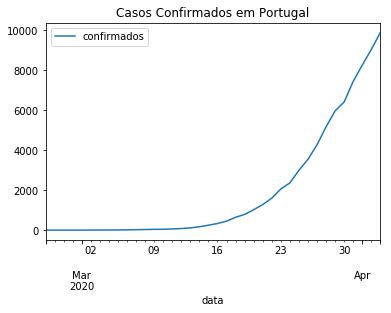

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

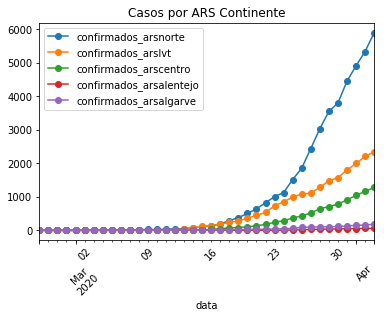

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

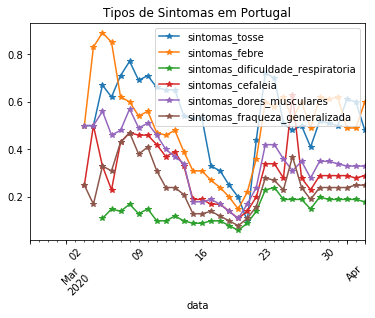

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

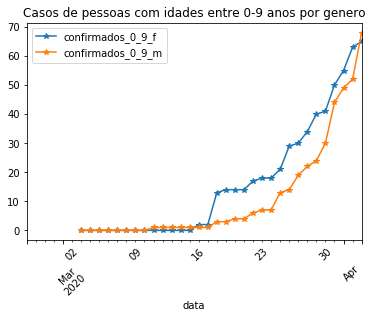

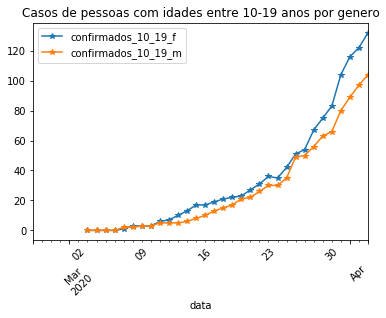

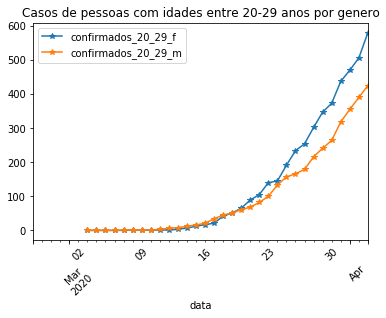

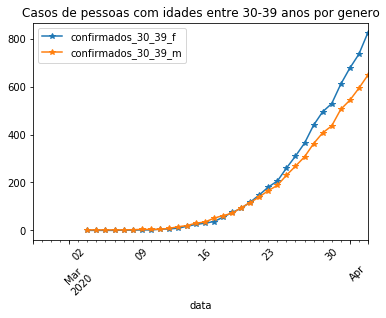

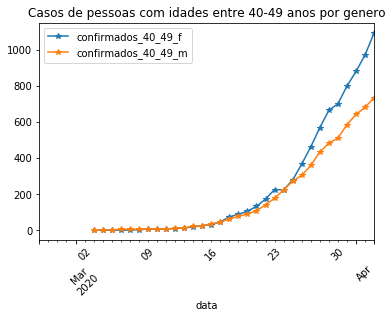

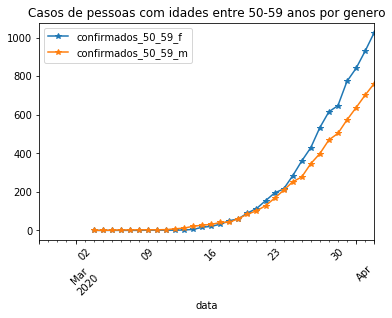

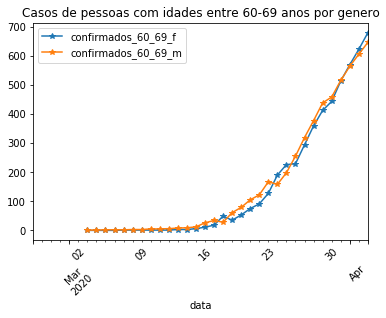

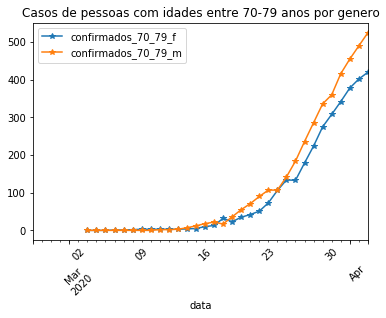

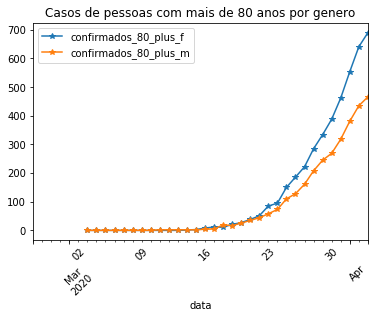

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


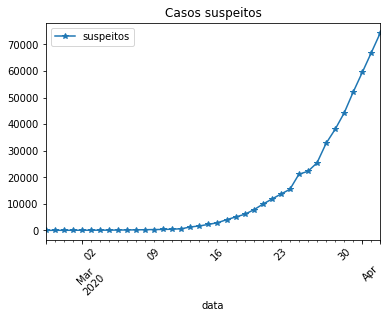

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

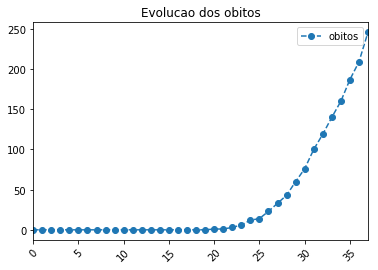

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060, 2362, 2995, 3544, 4268, 5170, 5962, 6408, 7443, 8251, 9034,9886 ])

In [15]:
print (confir)

[   2    4    6    9   13   21   30   39   41   59   78  112  169  245
  331  448  642  785 1020 1280 1600 2060 2362 2995 3544 4268 5170 5962
 6408 7443 8251 9034 9886]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:32]), x[:32])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1200.
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           9.42e-26
Time:                        23:20:53   Log-Likelihood:                -15.390
No. Observations:                  32   AIC:                             34.78
Df Residuals:                      30   BIC:                             37.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6484      0.140     11.805      0.000       1.363       1.934
x1             0.2681      0.008     34.638      0.000       0.252       0.284
==============================================================================
Omnibus:                        3.747   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.245
Skew:                          -0.771   Prob(JB):                        0.197
Kurtosis:                       2.764   Cond. No.                         35.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

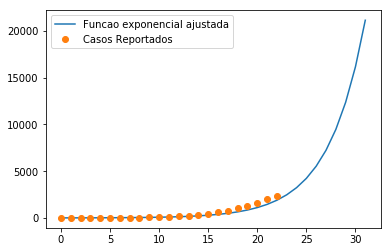

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:32])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:23], "o", label="Casos Reportados")
plt.legend()
plt.show()